## Introduction
*In this project we aim to gain insights on Alzeheimer and Other Dementia diseases, We'll explore two different but relevant Datasets in order to derive comprehensive insights and findings from the combined datasets*
#### Questions We Seek To Answer:
* Has the death rate changed over the years?
* Are there some countries with higher death rates than others?
* How has the death rate changed over the years for different countries?
* Which entity has the highest death rate over the years?
* Is there a correlation between death rate and number of neurologists?

#### Importing Python Modules

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

#### Loading the data into a pandas datafame
*We called the dataframe `ddr` which is an abbreviation for `Dementia Death Rates`*

In [49]:
ddr = pd.read_csv('dementia-death-rates new.csv')
ddr.head(10)

,Entity,Code,Year,Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,31.83
1,African Region (WHO),0,1990,23.04
2,Albania,ALB,1990,24.78
3,Algeria,DZA,1990,28.78
4,American Samoa,ASM,1990,24.21
5,Andorra,AND,1990,21.23
6,Angola,AGO,1990,21.39
7,Antigua and Barbuda,ATG,1990,20.92
8,Argentina,ARG,1990,20.94
9,Armenia,ARM,1990,21.20


*Right off the bat we see that one column has a really long name that is inconvenient to use, so let's rename it to `Death_Rate`*

In [50]:
ddr.rename(columns={"Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: Age-standardized (Rate)" : 'Death_Rate' },\
           inplace = True)

#### Checking for Missing Data
*The dataset doesn't seem to have any `null` data, however when we looked at the first 10 rows of the dataset we noticed that the `Code` for 'African Region (WHO)' is filled with `0` which indicates that there are missing data in that column however it's not marked as null.*

In [51]:
ddr.isnull().sum().reset_index()

,index,0
0,Entity,0
1,Code,0
2,Year,0
3,Death_Rate,0


*Dropping duplicates if there are any, there was no duplicates found in the dataset*

In [52]:
print(len(ddr))
ddr.drop_duplicates(inplace = True)
len(ddr)

6840


6840

#### Summary Statistics
*Our initial observation is now approved, there are `690` rows with `0` value in the `Code` column. However, I'm not gonna fill those missing data since they're not gonna be relevant to our analysis since I plan to use the `Entity` column and not the `Code` one, also for the `Year & Death_Rate` columns there doesn't seem to be any missing data nor outliers in them, as we can see the min and max values for both columns are reasonable*

In [53]:
ddr.describe(include = 'all')

,Entity,Code,Year,Death_Rate
count,6840,6840,6840.0,6840.000000
unique,228,206,NaN,NaN
top,Afghanistan,0,NaN,NaN
freq,30,690,NaN,NaN
mean,NaN,NaN,2004.5,23.174693
...,...,...,...,...
min,NaN,NaN,1990.0,15.090000
25%,NaN,NaN,1997.0,21.340000
50%,NaN,NaN,2004.5,22.950000
75%,NaN,NaN,2012.0,24.830000


*The Data Type of each column is right so no changes are needed.*

In [54]:
ddr.dtypes

Entity         object
Code           object
Year            int64
Death_Rate    float64
dtype: object

*The Dataset is set between the years `1990` and `2019`, this step also confirms that there are no missing nor zero values in the `Year` column*

In [55]:
ddr.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

#### Importing a Dataset Through API
*Importing all datasets API indicators and filtering through them for all datasets related to Dementia*

In [56]:
import requests
import json

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

base_url = 'https://ghoapi.azureedge.net/api/Indicator'
response = requests.get(base_url)
if response.status_code == 200:
    data = response.text
    parse_json = json.loads(data)
else:
    print('Failed to retrieve data')
api_data = pd.DataFrame(parse_json['value'])
api_data['is_gdo'] = api_data.IndicatorCode.str.contains("GDO.+", regex = True)
gdo = api_data[api_data['is_gdo'] == True]
gdo

,IndicatorCode,IndicatorName,Language,is_gdo
56,GDO_q10x1,National regulator approval of anti-dementia medication,EN,True
57,GDO_q10x2_1AVAIL,Availability of atleast one adult hygiene products for people with dementia,EN,True
70,GDO_q10x1x1,Availability of generic anti-dementia medication,EN,True
71,GDO_q10x1x2,Availability of at least one anti-dementia medication approved for on-label use reimbursement,EN,True
87,GDO_q10x2_TECH,Availability of atleast one assistive technology for people with dementia,EN,True
...,...,...,...,...
752,GDO_q9_6,Outpatient social centres,EN,True
874,GDO_q9x2_5,Estimated percentage of residential long-term care facilities following national dementia standards,EN,True
875,GDO_q9x4_1,"Density of adult day centres (per 100,000 population)",EN,True
876,GDO_q9x4_3,"Dementia-specific adult day centre places (per 10,000 population)",EN,True


*Looping through all Dementia related datasets and viewing the first 5 rows of each one in order to make a decision of which one to pick*

In [57]:
base_url = 'https://ghoapi.azureedge.net/api'
# Uncomment the next line and comment the line after it to view the first 5 rows of all indicators, this step was made for better performance
# for i in range(len(gdo)):
for i in range(5):
    indicator = gdo.IndicatorCode.iloc[i]
    
    response = requests.get(base_url+'/'+indicator)
    if response.status_code == 200:
        data = response.text
        parse_json = json.loads(data)
    else:
        print('Failed to retrieve data')
    indicator_selection_data = pd.DataFrame(parse_json['value'])
    print(gdo.IndicatorName.iloc[i])
    display(indicator_selection_data.head())

National regulator approval of anti-dementia medication


,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,7164307,GDO_q10x1,COUNTRY,EST,EUR,YEAR,Europe,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:30:33+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
1,658153,GDO_q10x1,COUNTRY,IND,SEAR,YEAR,South-East Asia,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:30:14+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
2,4511076,GDO_q10x1,COUNTRY,HUN,EUR,YEAR,Europe,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:34:00+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
3,6298423,GDO_q10x1,COUNTRY,DNK,EUR,YEAR,Europe,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:31:07+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
4,6128987,GDO_q10x1,COUNTRY,CAN,AMR,YEAR,Americas,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:30:19+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00


Availability of atleast one adult hygiene products for people with dementia


,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,2062397,GDO_q10x2_1AVAIL,COUNTRY,POL,YEAR,EUR,Europe,None,2017,None,None,None,None,None,None,None,Reimbursable,None,None,None,None,2021-06-25T09:35:12+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
1,2806061,GDO_q10x2_1AVAIL,COUNTRY,TUN,YEAR,EMR,Eastern Mediterranean,None,2017,None,None,None,None,None,None,None,Not Reimbursable,None,None,None,None,2021-06-25T09:33:37+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
2,1217324,GDO_q10x2_1AVAIL,COUNTRY,KOR,YEAR,WPR,Western Pacific,None,2017,None,None,None,None,None,None,None,Reimbursable,None,None,None,None,2021-06-25T09:32:29+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
3,5316318,GDO_q10x2_1AVAIL,COUNTRY,JOR,YEAR,EMR,Eastern Mediterranean,None,2017,None,None,None,None,None,None,None,Reimbursable,None,None,None,None,2021-06-25T09:30:52+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
4,4634554,GDO_q10x2_1AVAIL,COUNTRY,FJI,YEAR,WPR,Western Pacific,None,2017,None,None,None,None,None,None,None,Not Available,None,None,None,None,2021-06-25T09:33:49+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00


Availability of generic anti-dementia medication


,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,3577702,GDO_q10x1x1,COUNTRY,CZE,YEAR,EUR,Europe,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:32:34+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
1,4995671,GDO_q10x1x1,COUNTRY,FRA,YEAR,EUR,Europe,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:33:01+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
2,6789323,GDO_q10x1x1,COUNTRY,USA,YEAR,AMR,Americas,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:32:45+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
3,2158200,GDO_q10x1x1,COUNTRY,DEU,YEAR,EUR,Europe,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:31:12+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
4,3080474,GDO_q10x1x1,COUNTRY,BLZ,YEAR,AMR,Americas,None,2017,None,None,None,None,None,None,None,No,None,None,None,None,2021-06-25T09:30:37+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00


Availability of at least one anti-dementia medication approved for on-label use reimbursement


,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,148178,GDO_q10x1x2,COUNTRY,OMN,YEAR,EMR,Eastern Mediterranean,None,2017,None,None,None,None,None,None,None,No,None,None,None,None,2021-06-25T09:34:34+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
1,4191920,GDO_q10x1x2,COUNTRY,THA,YEAR,SEAR,South-East Asia,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:31:46+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
2,1994139,GDO_q10x1x2,COUNTRY,TUN,YEAR,EMR,Eastern Mediterranean,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:33:37+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
3,18533,GDO_q10x1x2,COUNTRY,SWZ,YEAR,AFR,Africa,None,2017,None,None,None,None,None,None,None,Not applicable,None,None,None,None,2021-06-25T09:30:46+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
4,1422458,GDO_q10x1x2,COUNTRY,MLT,YEAR,EUR,Europe,None,2017,None,None,None,None,None,None,None,Yes,None,None,None,None,2021-06-25T09:31:39+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00


Availability of  atleast one assistive technology for people with dementia


,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,3285499,GDO_q10x2_TECH,COUNTRY,TUR,EUR,YEAR,Europe,None,2017,None,None,None,None,None,None,None,Reimbursable,None,None,None,None,2021-06-25T09:35:01+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
1,3898962,GDO_q10x2_TECH,COUNTRY,CZE,EUR,YEAR,Europe,None,2017,None,None,None,None,None,None,None,Reimbursable,None,None,None,None,2021-06-25T09:32:34+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
2,3967464,GDO_q10x2_TECH,COUNTRY,CHL,AMR,YEAR,Americas,None,2017,None,None,None,None,None,None,None,Reimbursable,None,None,None,None,2021-06-25T09:33:26+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
3,3837806,GDO_q10x2_TECH,COUNTRY,SVN,EUR,YEAR,Europe,None,2017,None,None,None,None,None,None,None,Reimbursable,None,None,None,None,2021-06-25T09:32:56+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
4,3646506,GDO_q10x2_TECH,COUNTRY,ISR,EUR,YEAR,Europe,None,2017,None,None,None,None,None,None,None,Reimbursable,None,None,None,None,2021-06-25T09:32:19+02:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00


*Picking a few interesting ones to choose from*
* GDO_q6x1_3 - Number of geriatricians or psychogeriatricians (per 100,000)
* GDO_q12x2x1x1_1	- Accessibility of dementia carer training and education [Capital/capital and main cities/capital, main cities, rural areas]
* GDO_q11x2x3	- Dementia nongovernmental organization staff primarily salaried/volunteer
* GDO_q11x2x5 - Provision of governmental funding to dementia nongovernmental organization for activities/servicesi
* GDO_q6x1_2 - Number of neurologists (per 100,000)

In [58]:
base_url = 'https://ghoapi.azureedge.net/api'
indicator = 'GDO_q6x1_2'
response = requests.get(base_url+'/'+indicator)
if response.status_code == 200:
    data = response.text
    parse_json = json.loads(data)
else:
    print('Failed to retrieve data')
neurologists_dataset = pd.DataFrame(parse_json['value'])
display(neurologists_dataset)

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,1803121,GDO_q6x1_2,COUNTRY,MDV,SEAR,YEAR,South-East Asia,None,2017,None,None,None,None,None,None,None,Not available,None,None,None,None,2017-12-08T06:58:09+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
1,4989085,GDO_q6x1_2,COUNTRY,AUS,WPR,YEAR,Western Pacific,None,2017,None,None,None,None,None,None,None,2.1,None,None,None,None,2017-12-08T06:58:07+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
2,2985282,GDO_q6x1_2,COUNTRY,CHL,AMR,YEAR,Americas,None,2017,None,None,None,None,None,None,None,4.79,None,None,None,None,2017-12-08T06:58:03+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
3,3782975,GDO_q6x1_2,COUNTRY,CRI,AMR,YEAR,Americas,None,2017,None,None,None,None,None,None,None,0.61,None,None,None,None,2017-12-08T06:58:11+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
4,6544809,GDO_q6x1_2,COUNTRY,MUS,AFR,YEAR,Africa,None,2017,None,None,None,None,None,None,None,0.23,None,None,None,None,2017-12-08T06:58:02+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,6350914,GDO_q6x1_2,COUNTRY,BGD,SEAR,YEAR,South-East Asia,None,2017,None,None,None,None,None,None,None,0.09,None,None,None,None,2017-12-08T06:57:59+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
17,5075705,GDO_q6x1_2,COUNTRY,SWZ,AFR,YEAR,Africa,None,2017,None,None,None,None,None,None,None,0,None,None,None,None,2017-12-08T06:58:08+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
18,6781518,GDO_q6x1_2,COUNTRY,HUN,EUR,YEAR,Europe,None,2017,None,None,None,None,None,None,None,6.6,None,None,None,None,2017-12-08T06:58:11+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
19,5198885,GDO_q6x1_2,COUNTRY,QAT,EMR,YEAR,Eastern Mediterranean,None,2017,None,None,None,None,None,None,None,1.78,None,None,None,None,2017-12-08T06:57:56+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00


In [59]:
neurologists_clean = pd.melt(neurologists_dataset, id_vars= ['SpatialDim', 'ParentLocation'],\
                                 value_vars=['Value'], var_name='Var_name', value_name='value')
neurologists_clean = neurologists_clean[['SpatialDim', 'ParentLocation', 'value']]
neurologists_clean.rename(columns = {'SpatialDim': 'Country_Code', 'ParentLocation': 'Location', 'value': 'Neurologists_Number'},\
                          inplace = True)
neurologists_clean

,Country_Code,Location,Neurologists_Number
0,MDV,South-East Asia,Not available
1,AUS,Western Pacific,2.1
2,CHL,Americas,4.79
3,CRI,Americas,0.61
4,MUS,Africa,0.23
...,...,...,...
16,BGD,South-East Asia,0.09
17,SWZ,Africa,0
18,HUN,Europe,6.6
19,QAT,Eastern Mediterranean,1.78


In [60]:
country_codes = pd.read_csv('country_codes.csv')
country_codes

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
244,Western Sahara,ESH
245,Yemen,YEM
246,Zambia,ZMB
247,Zimbabwe,ZWE


In [61]:
list_of_countries = []
for code in neurologists_clean.Country_Code:
    list_of_countries.append(country_codes.Country[country_codes[country_codes['Code'] == code].index[0]])
neurologists_clean['Country'] = list_of_countries
neurologists_clean

,Country_Code,Location,Neurologists_Number,Country
0,MDV,South-East Asia,Not available,Maldives
1,AUS,Western Pacific,2.1,Australia
2,CHL,Americas,4.79,Chile
3,CRI,Americas,0.61,Costa Rica
4,MUS,Africa,0.23,Mauritius
...,...,...,...,...
16,BGD,South-East Asia,0.09,Bangladesh
17,SWZ,Africa,0,Eswatini
18,HUN,Europe,6.6,Hungary
19,QAT,Eastern Mediterranean,1.78,Qatar


*According to https://www.europeinnumbers.com/Italy/neurologists/ Italy's number of Neurologists per 100,000 people in 2016 was 10.73, Couldn't find any data in 2017 so we can fill out the missing data for Italy with that number since it wouldn't change that much in the course of a year.*
*However for the rest of the missing values for other countries there was no data to be found whatsoever, and interpolating these data would most definitely introduce bias, so it's best if we drop these rows.*

In [62]:
notaval_index = neurologists_clean[neurologists_clean.Neurologists_Number == 'Not available'].index
neurologists_clean.Neurologists_Number[8] = 10.73
neurologists_clean.drop(notaval_index, inplace = True)
neurologists_clean

,Country_Code,Location,Neurologists_Number,Country
1,AUS,Western Pacific,2.1,Australia
2,CHL,Americas,4.79,Chile
3,CRI,Americas,0.61,Costa Rica
4,MUS,Africa,0.23,Mauritius
5,SWE,Europe,4.2,Sweden
...,...,...,...,...
16,BGD,South-East Asia,0.09,Bangladesh
17,SWZ,Africa,0,Eswatini
18,HUN,Europe,6.6,Hungary
19,QAT,Eastern Mediterranean,1.78,Qatar


*Cleaning a couple of Country names for future analysis*

In [63]:
neurologists_clean.Country[6] = 'Dominican Republic'
neurologists_clean.Country[9] = 'Netherlands'
neurologists_clean

,Country_Code,Location,Neurologists_Number,Country
1,AUS,Western Pacific,2.1,Australia
2,CHL,Americas,4.79,Chile
3,CRI,Americas,0.61,Costa Rica
4,MUS,Africa,0.23,Mauritius
5,SWE,Europe,4.2,Sweden
...,...,...,...,...
16,BGD,South-East Asia,0.09,Bangladesh
17,SWZ,Africa,0,Eswatini
18,HUN,Europe,6.6,Hungary
19,QAT,Eastern Mediterranean,1.78,Qatar


In [64]:
print(neurologists_clean.dtypes)
neurologists_clean.Neurologists_Number = neurologists_clean.Neurologists_Number.astype(float)
neurologists_clean.dtypes

Country_Code           object
Location               object
Neurologists_Number    object
Country                object
dtype: object


Country_Code            object
Location                object
Neurologists_Number    float64
Country                 object
dtype: object

In [65]:
neurologists_clean.to_csv('neurologists_clean', index = False)

In [66]:
ddr_2017 = ddr[((ddr.Entity.isin(neurologists_clean.Country)) & (ddr.Year == 2017))]
ddr_2017

,Entity,Code,Year,Death_Rate
6166,Australia,AUS,2017,21.64
6171,Bangladesh,BGD,2017,17.88
6193,Chile,CHL,2017,20.59
6199,Costa Rica,CRI,2017,24.33
6209,Dominican Republic,DOM,2017,21.09
...,...,...,...,...
6316,Qatar,QAT,2017,28.15
6348,Sweden,SWE,2017,20.35
6349,Switzerland,CHE,2017,21.18
6355,Togo,TGO,2017,25.40


In [67]:
joined_dataset = ddr_2017.merge(neurologists_clean, how = 'inner', left_on = 'Entity', right_on = 'Country')
joined_dataset

,Entity,Code,Year,Death_Rate,Country_Code,Location,Neurologists_Number,Country
0,Australia,AUS,2017,21.64,AUS,Western Pacific,2.10,Australia
1,Bangladesh,BGD,2017,17.88,BGD,South-East Asia,0.09,Bangladesh
2,Chile,CHL,2017,20.59,CHL,Americas,4.79,Chile
3,Costa Rica,CRI,2017,24.33,CRI,Americas,0.61,Costa Rica
4,Dominican Republic,DOM,2017,21.09,JPN,Western Pacific,4.38,Dominican Republic
...,...,...,...,...,...,...,...,...
13,Qatar,QAT,2017,28.15,QAT,Eastern Mediterranean,1.78,Qatar
14,Sweden,SWE,2017,20.35,SWE,Europe,4.20,Sweden
15,Switzerland,CHE,2017,21.18,CHE,Europe,13.10,Switzerland
16,Togo,TGO,2017,25.40,TGO,Africa,10.73,Togo


#### Exploratory Data Analysis (EDA)

In [68]:
ddr.head()

,Entity,Code,Year,Death_Rate
0,Afghanistan,AFG,1990,31.83
1,African Region (WHO),0,1990,23.04
2,Albania,ALB,1990,24.78
3,Algeria,DZA,1990,28.78
4,American Samoa,ASM,1990,24.21


*The Death Rate is normally distributed, there are no outliers nor skewness*

<Figure size 500x500 with 0 Axes>

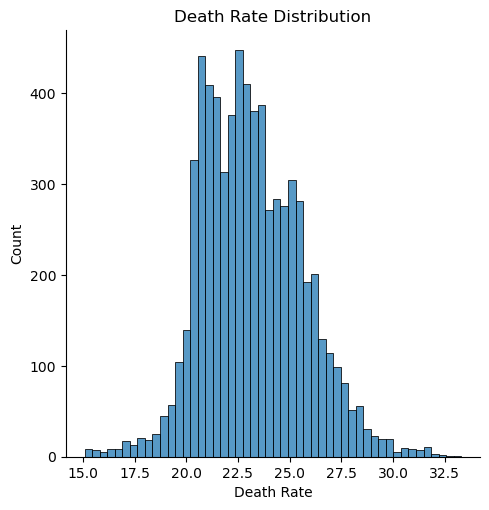

<Figure size 640x480 with 0 Axes>

In [69]:
plt.figure(figsize = (5,5))
sns.displot(ddr.Death_Rate)
plt.title('Death Rate Distribution')
plt.xlabel('Death Rate')
plt.show()
plt.clf()

*Grouping the dataset by `Entity`, calculating the Average `Death Rate` over the years, and sorting them in a descending order*

In [70]:
ddr_means = ddr.drop(['Code', 'Year'], axis = 1).groupby(['Entity']).mean().sort_values(by =['Death_Rate'], ascending = False).reset_index()
ddr_means

,Entity,Death_Rate
0,Afghanistan,31.111333
1,Kiribati,30.481667
2,Oman,29.559333
3,Libya,28.611000
4,Gabon,28.213000
...,...,...
223,South-East Asia Region (WHO),18.773333
224,Bangladesh,18.108000
225,South Asia (WB),17.796000
226,Nepal,17.178667


*Taking a subset of `Top 10` from the previous dataset to use in further analysis*

In [71]:
top_10_ddr_means = ddr_means[:10]
top_10_ddr_means

,Entity,Death_Rate
0,Afghanistan,31.111333
1,Kiribati,30.481667
2,Oman,29.559333
3,Libya,28.611000
4,Gabon,28.213000
5,Bahrain,28.121000
6,Mozambique,27.832667
7,Algeria,27.646667
8,Lebanon,27.532667
9,Vietnam,27.487667


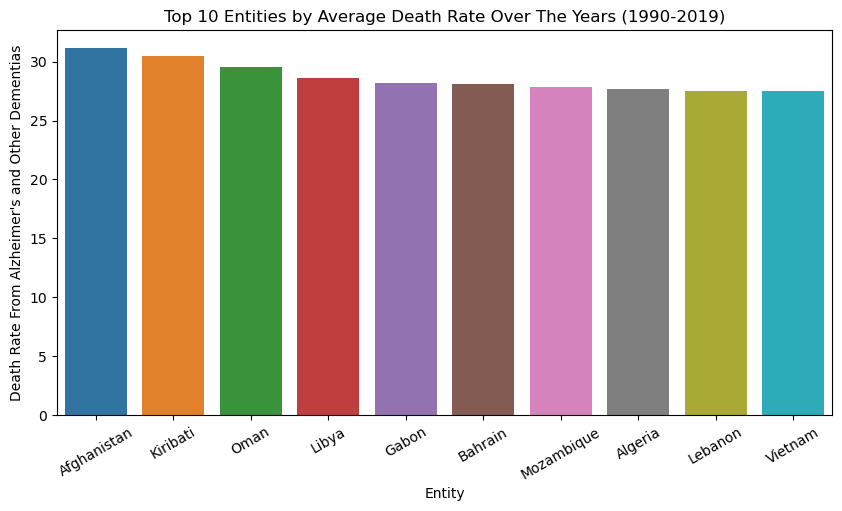

<Figure size 640x480 with 0 Axes>

In [72]:
plt.figure(figsize = (10,5))
ax =plt.subplot()
sns.barplot(data = top_10_ddr_means, x = 'Entity', y = 'Death_Rate')
plt.title('Top 10 Entities by Average Death Rate Over The Years (1990-2019)')
plt.xlabel('Entity')
plt.ylabel("Death Rate From Alzheimer's and Other Dementias")
ax.set_xticklabels(top_10_ddr_means.Entity, rotation = 30)
plt.show()
plt.clf()

In [73]:
ddr_subset = ddr[ddr.Entity.isin(top_10_ddr_means.Entity)]
ddr_subset

,Entity,Code,Year,Death_Rate
0,Afghanistan,AFG,1990,31.83
3,Algeria,DZA,1990,28.78
14,Bahrain,BHR,1990,28.54
72,Gabon,GAB,1990,27.53
101,Kiribati,KIR,1990,28.92
...,...,...,...,...
6719,Lebanon,LBN,2019,26.79
6722,Libya,LBY,2019,28.55
6742,Mozambique,MOZ,2019,29.74
6760,Oman,OMN,2019,28.84


*The Box plot combined with the Stip plot explain the average Death Rates from the previous graph, The Box plot shows how wide the range of values is, while the Strip plot explains the average Death Rate for each country, for example we can see that even though `Kiribati` has the highest Death Rate recorded its wide range of values and the cluster of data around 29-30 puts the average Death Rate around 30, while for `Afghanistan` we can see that the range of values of Death Rates is narrow compared to Kiribati, and there's a cluster of data around 31 which puts the average Death Rate around that value*

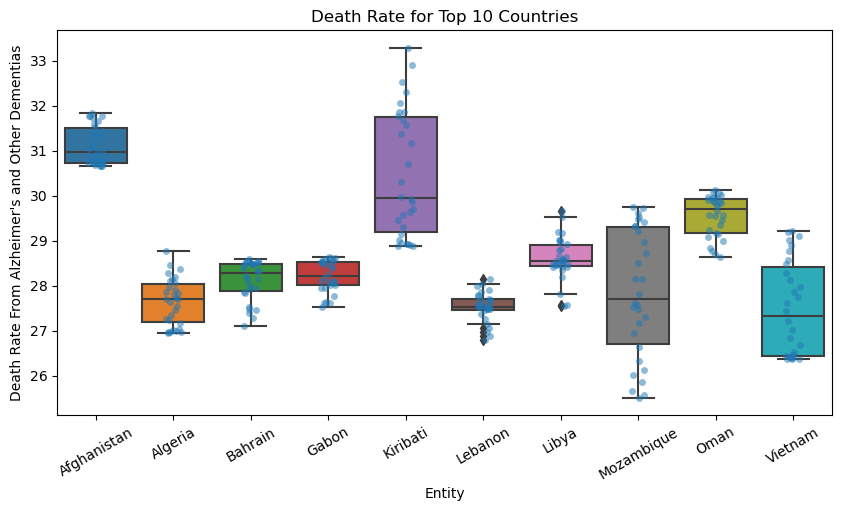

<Figure size 640x480 with 0 Axes>

In [74]:
plt.figure(figsize = (10, 5))
ax = plt.subplot()
sns.boxplot(x = 'Entity' , y = 'Death_Rate', data = ddr_subset)
sns.stripplot(x = 'Entity', y = 'Death_Rate', data = ddr_subset, size = 5, alpha = 0.5)
ax.set_xticklabels(ddr_subset.Entity.unique(), rotation = 30)
plt.ylabel("Death Rate From Alzheimer's and Other Dementias")
plt.xlabel('Entity')
plt.title('Death Rate for Top 10 Countries')
plt.show()
plt.clf()

*Analysing the Change of Average Global Death Rate by year*

In [75]:
death_rate_by_year = ddr.drop(['Code', 'Entity'], axis = 1).groupby(['Year']).mean().reset_index()
death_rate_by_year

,Year,Death_Rate
0,1990,22.775263
1,1991,22.790088
2,1992,22.831798
3,1993,22.879518
4,1994,22.904605
...,...,...
25,2015,23.390088
26,2016,23.389035
27,2017,23.399518
28,2018,23.412982


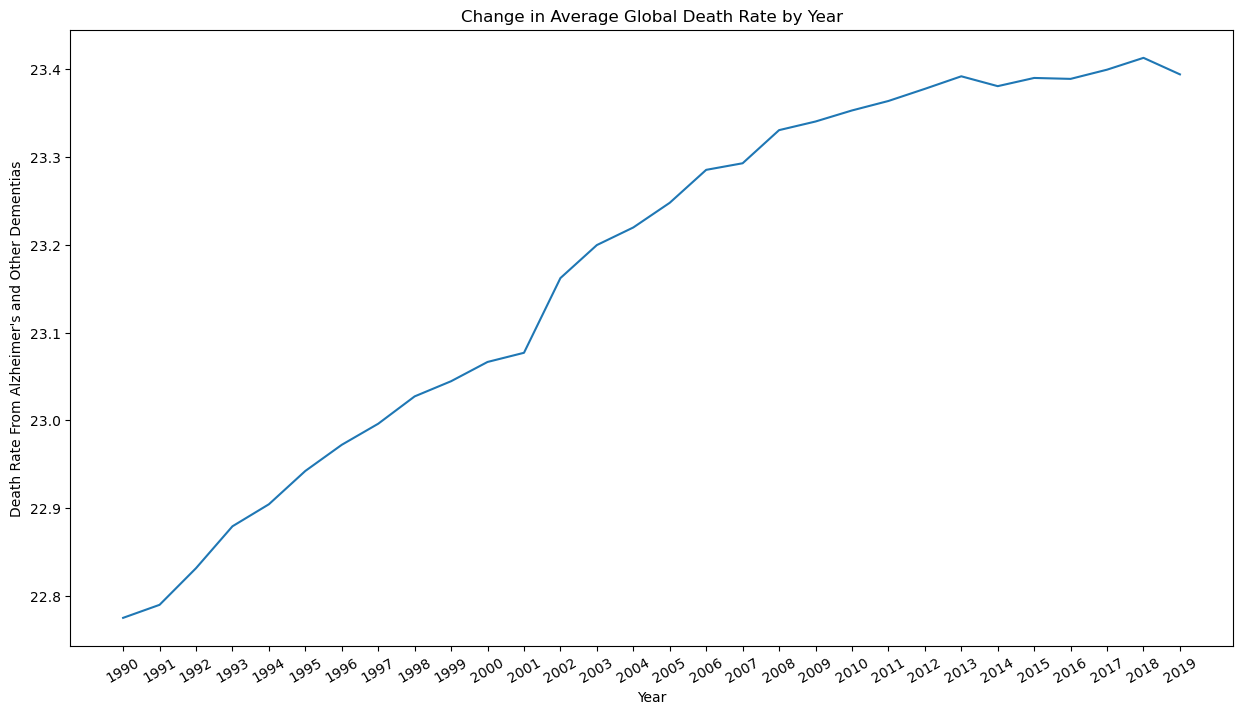

<Figure size 640x480 with 0 Axes>

In [76]:
plt.figure(figsize = (15,8))
ax = plt.subplot()
sns.lineplot(x = 'Year', y = 'Death_Rate', data = death_rate_by_year)
plt.title('Change in Average Global Death Rate by Year')
plt.xlabel('Year')
plt.ylabel("Death Rate From Alzheimer's and Other Dementias")
ax.set_xticks(death_rate_by_year.Year)
ax.set_xticklabels(death_rate_by_year.Year, rotation = 30)
plt.show()
plt.clf()

*Grouping the dataset by `Entity - Year` to track the yearly change of `Death Rate` for each Entity*

In [77]:
ddr_by_year = ddr.drop(['Code'], axis = 1).groupby(['Entity', 'Year']).mean().reset_index()
ddr_by_year

,Entity,Year,Death_Rate
0,Afghanistan,1990,31.83
1,Afghanistan,1991,31.78
2,Afghanistan,1992,31.78
3,Afghanistan,1993,31.78
4,Afghanistan,1994,31.72
...,...,...,...
6835,Zimbabwe,2015,24.83
6836,Zimbabwe,2016,24.88
6837,Zimbabwe,2017,24.91
6838,Zimbabwe,2018,24.97


*Taking a subset of `Top 5` by Average Death Rate so we can track the yearly change of Death Rate for these Entities*

In [78]:
top_5_ddr_by_year = ddr_by_year[ddr_by_year.Entity.isin(top_10_ddr_means.Entity[:6])]
top_5_ddr_by_year

,Entity,Year,Death_Rate
0,Afghanistan,1990,31.83
1,Afghanistan,1991,31.78
2,Afghanistan,1992,31.78
3,Afghanistan,1993,31.78
4,Afghanistan,1994,31.72
...,...,...,...
4465,Oman,2015,29.83
4466,Oman,2016,29.96
4467,Oman,2017,29.77
4468,Oman,2018,29.16


*As we can see in the graph below, most countries have fluctuations in their Death Rate over the years. However, `Afghanistan, Bahrain, Libya, and Oman` seem to be doing slightly better over the years, on the other hand `Gabon` seems to be doing slightly worse, and `Kiribati` is doing the worst of them all*

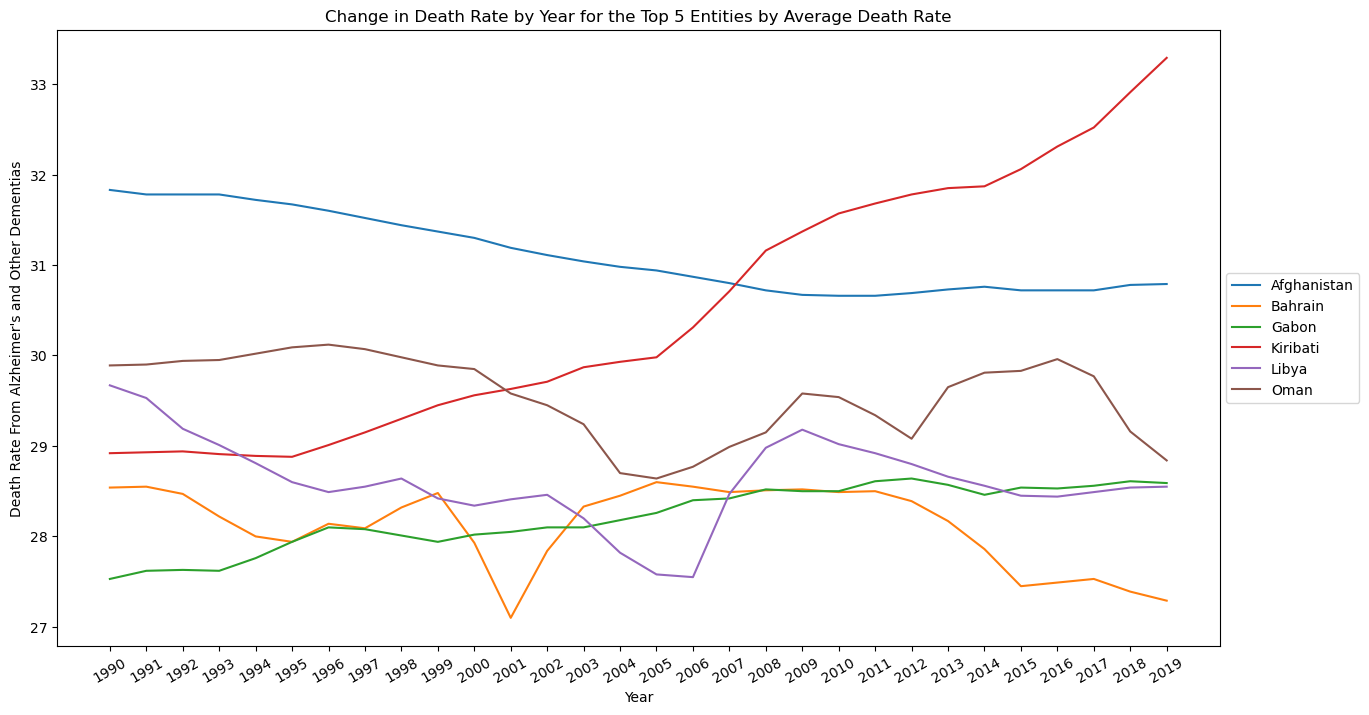

<Figure size 640x480 with 0 Axes>

In [79]:
plt.figure(figsize = (15,8))
ax = plt.subplot()
sns.lineplot(x = 'Year', y = 'Death_Rate', hue = 'Entity', data = top_5_ddr_by_year)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Change in Death Rate by Year for the Top 5 Entities by Average Death Rate')
plt.xlabel('Year')
plt.ylabel("Death Rate From Alzheimer's and Other Dementias")
ax.set_xticks(top_5_ddr_by_year.Year.unique())
ax.set_xticklabels(top_5_ddr_by_year.Year.unique(), rotation = 30)
plt.show()
plt.clf()

*`Kiribati` has the highest Death Rate over the years with the highest Death Rate recorded in `2019`, followed by `Afghanistan` which had the highest Death Rate in the `90s`*

In [80]:
top_10_of_all_time = ddr.nlargest(10, 'Death_Rate')
top_10_of_all_time

,Entity,Code,Year,Death_Rate
6713,Kiribati,KIR,2019,33.29
6485,Kiribati,KIR,2018,32.91
6257,Kiribati,KIR,2017,32.52
6029,Kiribati,KIR,2016,32.31
5801,Kiribati,KIR,2015,32.06
5573,Kiribati,KIR,2014,31.87
5345,Kiribati,KIR,2013,31.85
0,Afghanistan,AFG,1990,31.83
228,Afghanistan,AFG,1991,31.78
456,Afghanistan,AFG,1992,31.78


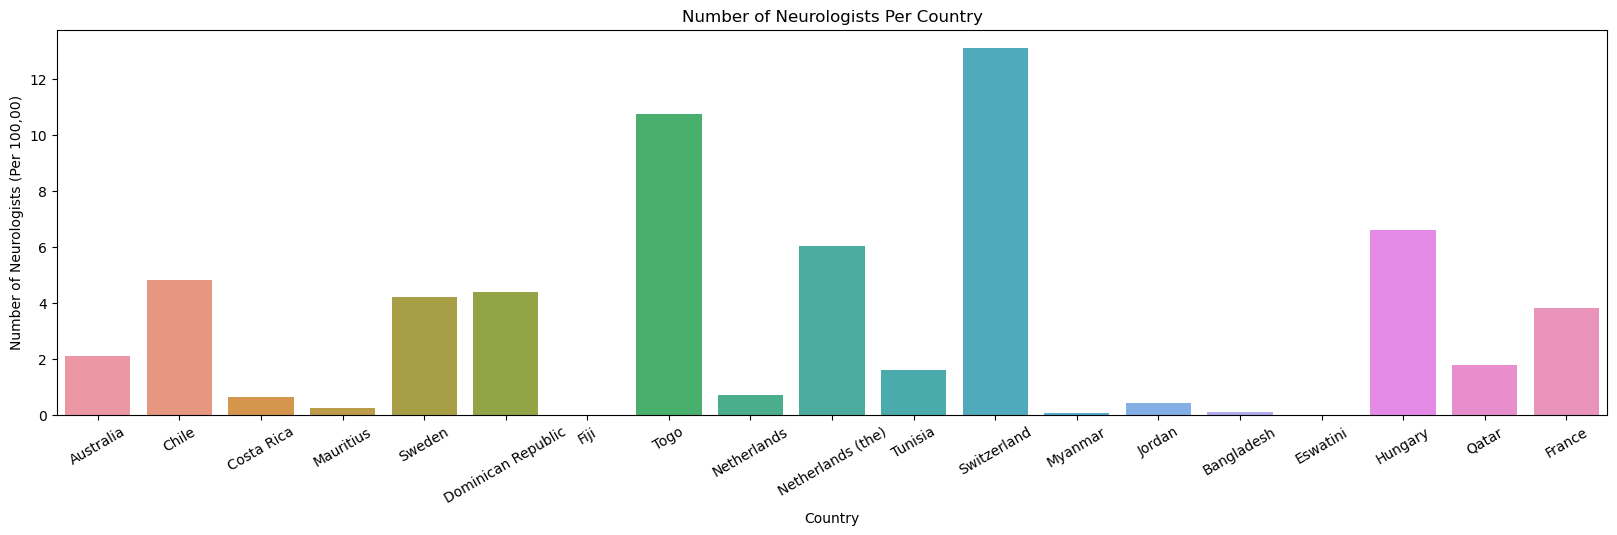

<Figure size 640x480 with 0 Axes>

In [81]:
plt.figure(figsize = (20,5))
ax =plt.subplot()
sns.barplot(data = neurologists_clean, x = 'Country', y = 'Neurologists_Number')
plt.title('Number of Neurologists Per Country')
plt.xlabel('Country')
plt.ylabel('Number of Neurologists (Per 100,00)')
ax.set_xticklabels(neurologists_clean.Country, rotation = 30)
plt.show()
plt.clf()

*According to the scatter plot there is no correlation between `Death Rate` and `Number of Neurologists`. However, we only looked at a small sample of countries and only one year (2017) since we're limited by the data provided by GHO, to strengthen this conclusion further research might be needed.*

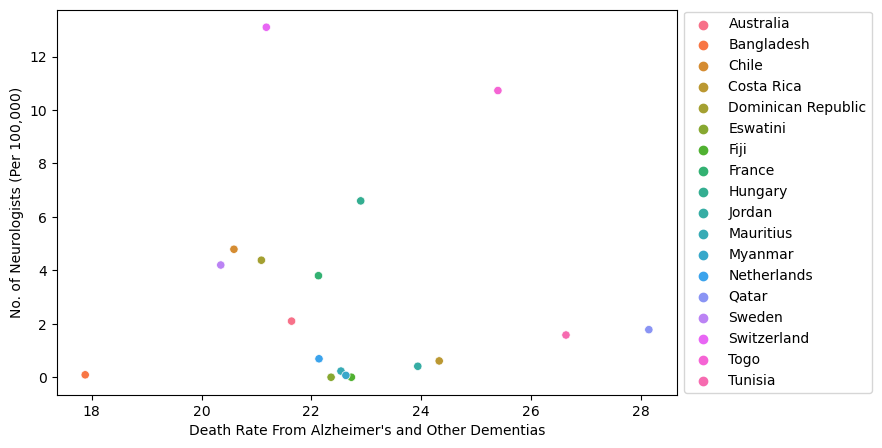

<Figure size 640x480 with 0 Axes>

In [82]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'Death_Rate', y = 'Neurologists_Number', hue = 'Country', data = joined_dataset)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.xlabel("Death Rate From Alzheimer's and Other Dementias")
plt.ylabel('No. of Neurologists (Per 100,000)')
plt.show()
plt.clf()

### Conclusion
*In this analysis we gained important insights about one of the leading causes of death, and we answered the following questions*
* Has the death rate changed over the years?
    * Yes it has, the Average Global Death Rate had a very slight increase from 22.8 to 23.4
* Are there some countries with higher death rates than others?
    * Yes, with Kiribati recording the highest Death Rate of 33.29 in 2019.
* Has the death rate changed over the years for different countries?
    * Yes it has, Kiribati has the highest change over the years with min. Death Rate of 28.88 and max. Death Rate of 33.29.
* Which entity has the highest death rate over the years?
    * Kiribati has the highest Death Rate in the 2000s, While Afghanistan had the highest Death Rate in the 90s.
* Is there a correlation between death rate and number of neurologists?
    * There's no correlation between Death Rate and Number of Neurologists, however this needs further research to confirm due to lack of data in years prior to 2017 provided by GHO.
 
### Further Research
*In order to understand better if there's a correlation between Death Rate by Alzheimer's and other Dementias and the number of Neurologists in a country, more data needs to be gathered and analyzed.*